In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [3]:
import cftime
import scipy

In [4]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

In [5]:
from load_gridcell_areas import *

In [6]:
T_1xCO2=xr.open_dataset('/glade/work/czarakas/disentangling_lai_effects/postprocessed_model_output/coupled_DEFmedslope_1xCO2_all/'+
                        'coupled_DEFmedslope_1xCO2_all.cam.h0.timeseries.TS.nc')
T_2xCO2=xr.open_dataset('/glade/work/czarakas/disentangling_lai_effects/postprocessed_model_output/'+
                        'coupled_DEFmedslope_2xCO2_FULL_03/'+
                        'coupled_DEFmedslope_2xCO2_FULL_03.cam.h0.timeseries.TS.nc')

In [7]:
1440/12

120.0

In [8]:
CO2_1x=T_1xCO2.TS[60*12:1440,:,:].mean(dim='time')
CO2_2x=T_2xCO2.TS[60*12:1440,:,:].mean(dim='time')

In [16]:
delta_T=CO2_2x-CO2_1x
delta_T=delta_T.reindex_like(landweights2, method='nearest',tolerance=0.05)
#CO2x2_warming_factor_1degreeglobal=1/(delta_T*landweights).mean(dim=['lat','lon'])

In [15]:
(delta_T*weight_factor_atm).mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(5.18295998)

In [17]:
(delta_T*landweights2).sum(dim=['lat','lon'])

<xarray.DataArray ()>
array(6.5112133, dtype=float32)

In [15]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/data_for_figures/response_to_CO2/'
ds_TS=delta_T.to_dataset(name='TS')
fname='Reponse_2xCO2_AnnualMean_Full.nc'
ds_TS.to_netcdf(fpath_out+fname)

# Other checks

In [48]:
#T_1xCO2=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/StomatalSlope2021/possible_duplicate/'+
#                        'coupled_DEFmedslope_1xCO2_all/lnd/proc/timeseries/coupled_DEFmedslope_1xCO2_all.clm2.h0.timeseries.TSKIN.nc')
#T_2xCO2=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/DisentanglingCO2Effects/'+
#                        'coupled_DEFmedslope_2xCO2_FULL_03/lnd/proc/timeseries/coupled_DEFmedslope_2xCO2_FULL_03.clm2.h0.timeseries.TSKIN.nc')
#T_2xCO2=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/StomatalSlope2021/possible_duplicate/'+
#                        'coupled_DEFmedslope_2xCO2_all/lnd/proc/timeseries/coupled_DEFmedslope_1xCO2_all.clm2.h0.timeseries.TSKIN.nc')

In [4]:
weight_factor = ds_h0.gw / ds_h0.gw.mean(dim='lat')

NameError: name 'ds_h0' is not defined

In [6]:
tseries=((T_2xCO2.TS.reindex_like(landweights, method='nearest',tolerance=0.05)*landweights).groupby('time.year').mean()*landweights).mean(dim=['lat','lon'])
tseries1=((T_1xCO2.TS.reindex_like(landweights, method='nearest',tolerance=0.05)*landweights).groupby('time.year').mean()*landweights).mean(dim=['lat','lon'])

NameError: name 'T_2xCO2' is not defined

In [7]:
plt.plot(tseries1,'.-k')
plt.plot(tseries,'.-')
#plt.xlim([-10,100])

NameError: name 'tseries1' is not defined

In [8]:
tseries=((T_2xCO2.TS.reindex_like(landweights, method='nearest',tolerance=0.05)*landweights)*landweights).mean(dim=['lat','lon'])
tseries1=((T_1xCO2.TS.reindex_like(landweights, method='nearest',tolerance=0.05)*landweights)*landweights).mean(dim=['lat','lon'])

NameError: name 'T_2xCO2' is not defined

In [9]:
plt.plot(tseries1,'.-k')
plt.plot(tseries,'.-')
plt.xlim([-10,100])

NameError: name 'tseries1' is not defined

In [12]:
delta_T.where(landweights>0).plot(cmap=plt.cm.get_cmap("RdBu_r",10), vmin=-1, vmax=1)

NameError: name 'delta_T' is not defined

In [10]:
(delta_T*weight_factor).mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(3.97905345)

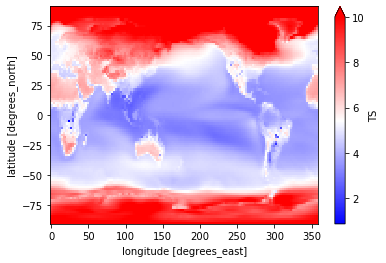

In [11]:
delta_T.plot(vmax=10, cmap=plt.cm.bwr)

In [12]:
(delta_T*landweights).mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(6.511213, dtype=float32)